## **DATA ANALYSIS BY USING PYTHON - BLINKIT ANALYSIS**

## **Import Libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Data**

In [17]:
df = pd.read_csv("C:/Data Analysis/PYTHON/Projects/Blinkit Sales Anlaysis/blinkit_data.csv")

## **Sample Data**

In [20]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [23]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


## **Size of Data**

In [26]:
print("Size of the Data:",df.shape)

Size of the Data: (8523, 12)


## **Field info**

In [29]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## **Data Types**

In [32]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## **Data Cleaning**

In [35]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [37]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF' : 'Low Fat',
                                                         'low fat' : 'Low Fat',
                                                         'reg' : 'Regular'})

In [39]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


# **Busines Requirements**

## **KPI's Requirements**

In [43]:
#total_sales

total_sales = df['Sales'].sum()

#avg_sales

avg_sales = df['Sales'].mean()

#no. of items sold

no_of_items_sold = df['Sales'].count()

#avg_rating

avg_rating = df['Rating'].mean()

#display

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Avg Sales: ${avg_sales:,.1f}")
print(f"No of items Sold: {no_of_items_sold:,.0f}")
print(f"Avg Rating: {avg_rating:,.1f}")

Total Sales: $1,201,681
Avg Sales: $141.0
No of items Sold: 8,523
Avg Rating: 4.0


## **Chart Requirements**

### **Total Sales By Fat Content**

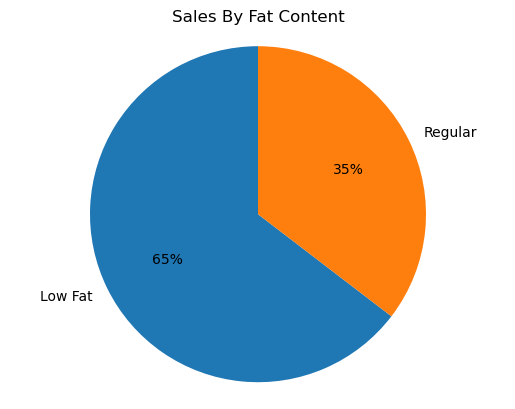

In [47]:
Sales_by_Fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(Sales_by_Fat , labels = Sales_by_Fat.index,
                        autopct = '%.0f%%',
                        startangle = 90)
plt.title('Sales By Fat Content')
plt.axis('equal')
plt.show()
        

### **Total Sales By Item type**

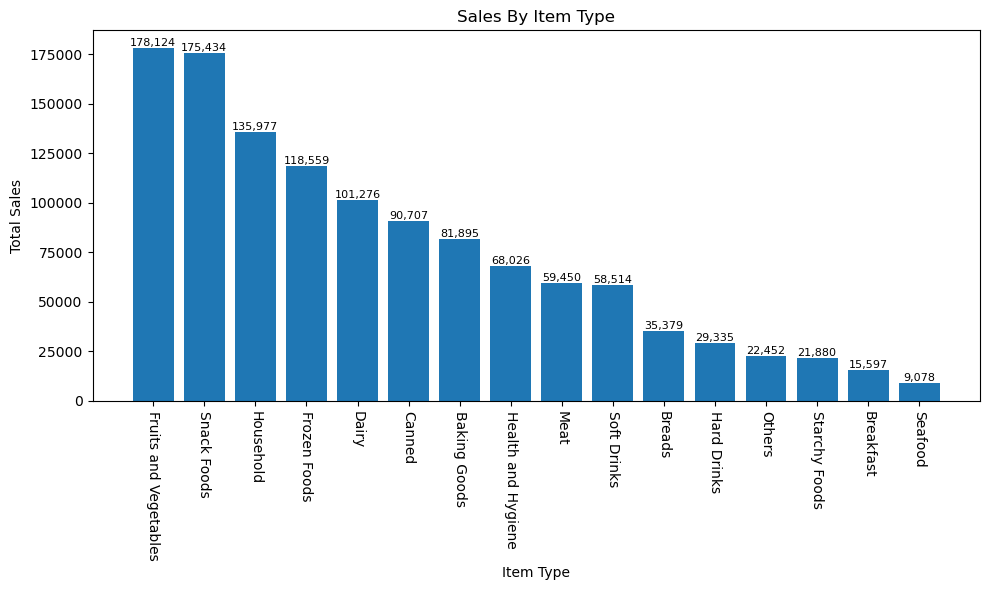

In [50]:
Sales_by_item = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize = (10,6))
bars = plt.bar(Sales_by_item.index , Sales_by_item.values)

plt.xticks(rotation = -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Sales By Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{ bar.get_height():,.0f}', ha = 'center' ,va = 'bottom' ,fontsize= 8)

plt.tight_layout()
plt.show()


### **Fat Content by Outlet Total Sales**

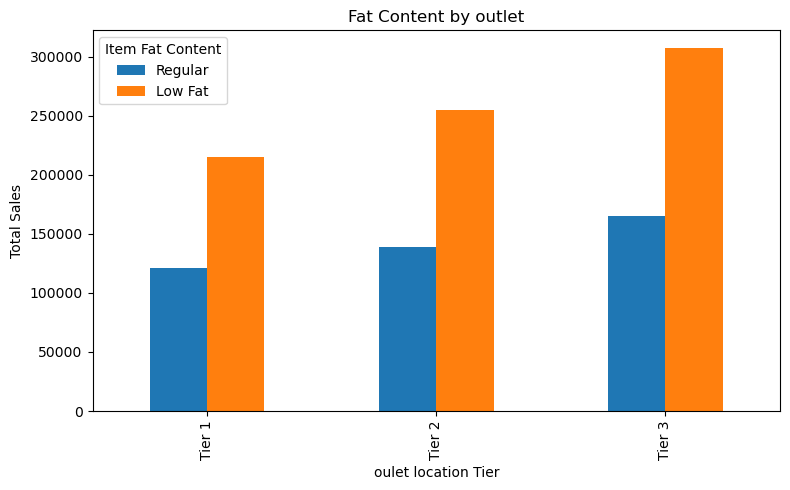

In [73]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular' , 'Low Fat']]

ax = grouped.plot(kind = 'bar' ,figsize = (8,5) , title = 'Fat Content by outlet')
plt.xlabel('oulet location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

### **Total Sales by Outlet Establishment**

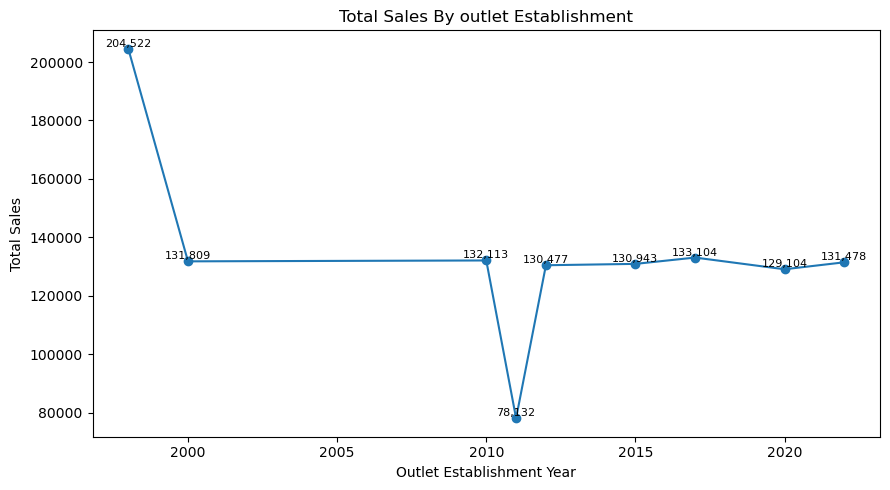

In [78]:
Sales_by_year = df.groupby( 'Outlet Establishment Year')['Sales'].sum()

plt.figure(figsize=(9,5))
plt.plot(Sales_by_year.index,Sales_by_year.values,marker='o' ,linestyle = '-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales By outlet Establishment')

for x, y in zip(Sales_by_year.index,Sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}', ha = 'center' , va = 'bottom' , fontsize = 8)

plt.tight_layout()
plt.show()

### **Sales by Outlet Size**

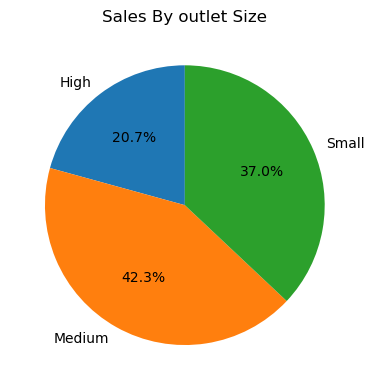

In [93]:
Sales_by_size  = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize = (4,4))
plt.pie(Sales_by_size, labels = Sales_by_size.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Sales By outlet Size')
plt.tight_layout()
plt.show()

### **Sales by Outlet Location**

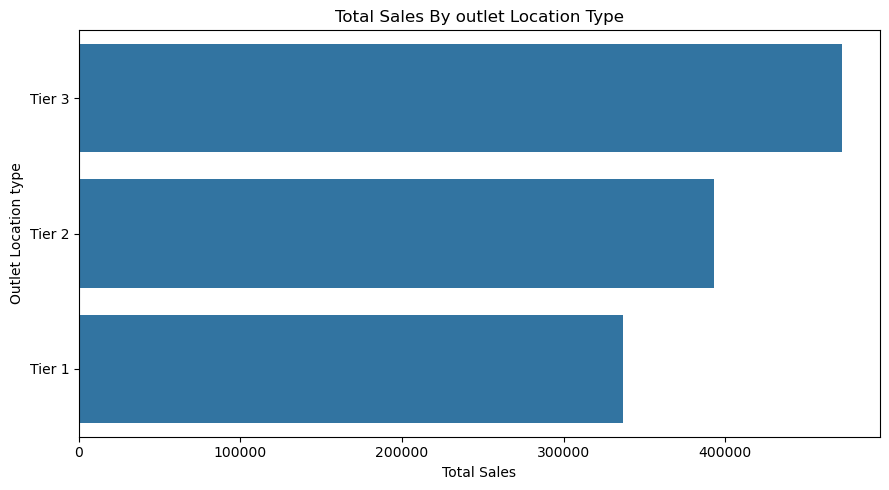

In [98]:
Sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
Sales_by_location = Sales_by_location.sort_values('Sales',ascending = False)

plt.figure(figsize = (9,5))
ax = sns.barplot(x='Sales', y = 'Outlet Location Type',data = Sales_by_location)

plt.xlabel('Total Sales')
plt.ylabel('Outlet Location type')
plt.title('Total Sales By outlet Location Type')
plt.tight_layout()
plt.show()